# NETD 


On commence avec un seul pixel, plein d'imagettes, et plusieurs fois.

On a une population de tirage de bruit, de moyenne nulle, de variance $Var_{tvh}$.
On tire T valeurs, et on répète N fois. Pour chaque tirage, on mesure la variance empirique non biaisée. 
$$E[s^2(T)] = Var_{tvh}$$
$$Var(s^2(T)) = \frac{2(T-1)\sigma_{tvh}^4}{(T-ddof)^2}$$
De plus, si le bruit est gaussien, la distribution de $s^2$ est gaussienne également.

In [13]:
import numpy as np
import scipy.stats


from noise3d import genseq
from noise3d import noise
from noise3d import bias

import matplotlib.pyplot as plt

def compute_results(var, V, H, T, N, ddof):

    vec_netd = []
    vec_netd_std = []
    for n in range(N):
        seq = genseq.genseq_3dnoise_seq(T, V, H, (0, 0, 0, 0, 0, 0, var_tvh))
        # Mesure de la variance empirique non biasiée
        vec_netd.append(noise.var_netd(seq, axis=0, ddof=ddof))
    vec_netd = np.asarray(vec_netd)
    
    
    ech = np.linspace(np.min(vec_netd), np.max(vec_netd), 100)
    val, bins, patchs = plt.hist(vec_netd, bins=ech, density=True)
    
    exp_mean = var_tvh*(T-1)/(T-ddof)
    exp_var = 2*var_tvh**2*(T-1)/((T-ddof)**2*(V*H))
    
    mean = np.mean(vec_netd)
    var = np.var(vec_netd)
    
    print("Valeur attendue : {}".format(var_tvh))
    print("Moyenne des variances mesurée : {}".format(mean))
    print("Moyenne attendue : {}".format(exp_mean))
    print("Ecart en % : {}".format((mean/exp_mean-1)*100))
    print("Variance des variances mesurée : {}".format(var))
    print("Variance attendue : {}".format(exp_var))
    print("Ecart en % : {}".format((var/exp_var-1)*100))
    
    ech_gauss = noise.gauss(ech, np.mean(vec_netd), np.std(vec_netd))
    ech_chi2 = scipy.stats.chi2.pdf(ech,
                                    df=(T-1)*(V*H), 
                                    loc=0, 
                                    scale=var_tvh**2/((T-ddof)*V*H))
    plt.plot(ech, ech_gauss)
    plt.plot(ech, ech_chi2)
        

## Non biaisée

### 1 pixel, 10 images

On vérifie que : 
- le bruit en entrée est gaussien
- la moyenne des variance empiriques mesurées vaut bien la variance attendue
- la variance des variances empiriques mesurées vaut bien $2Var_{tvh}^2/(T-1)
- la distribution des variances est gaussienne

Valeur attendue : 1
Moyenne des variances mesurée : 0.9991830112664579
Moyenne attendue : 1.0
Ecart en % : -0.08169887335420789
Variance des variances mesurée : 0.22184092690985838
Variance attendue : 0.2222222222222222
Ecart en % : -0.17158289056372622


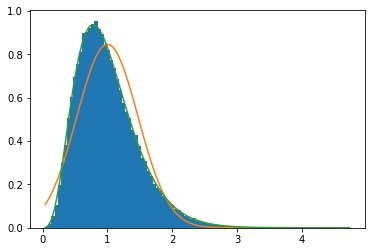

In [14]:
var_tvh = 1
V = 1
H = 1
T = 10
N = 100000
ddof=1
compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 30 images

Valeur attendue : 1
Moyenne des variances mesurée : 1.0005786637687115
Moyenne attendue : 1.0
Ecart en % : 0.057866376871151814
Variance des variances mesurée : 0.10526752571826817
Variance attendue : 0.10526315789473684
Ecart en % : 0.00414943235476084


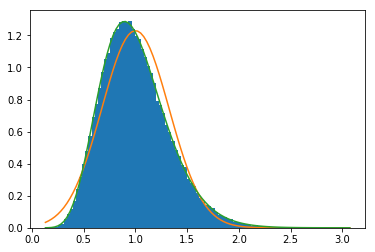

In [17]:
var_tvh = 1
V = 1
H = 1
T = 20
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 100 images

Valeur attendue : 1
Moyenne des variances mesurée : 0.9998122716923642
Moyenne attendue : 1.0
Ecart en % : -0.018772830763580384
Variance des variances mesurée : 0.020223718702593076
Variance attendue : 0.020202020202020204
Ecart en % : 0.10740757783571642


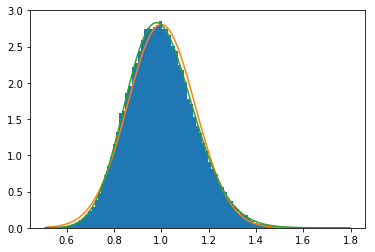

In [19]:
var_tvh = 1
V = 1
H = 1
T = 100
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixels, 1000 images

Valeur attendue : 1
Moyenne des variances mesurée : 1.0002324884099414
Moyenne attendue : 1.0
Ecart en % : 0.02324884099413893
Variance des variances mesurée : 0.0020010399885997654
Variance attendue : 0.002002002002002002
Ecart en % : -0.04805256944171443


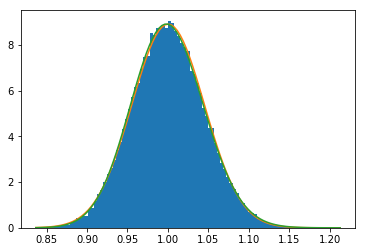

In [22]:
var_tvh = 1
V = 1
H = 1
T = 1000
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

### 100 pixels, 100 images

On moyenne les variances mesurées sur 100 pixels. La moyenne doit restée inchangée, mais la variance des variances mesurées doit être diminuée en 
$$Var(s^2)= \frac{2Var_{tvh}^2}{(T-1)VH}$$

Valeur attendue : 1
Moyenne des variances mesurée : 0.9999730952521022
Moyenne attendue : 1.0
Ecart en % : -0.0026904747897793513
Variance des variances mesurée : 0.00020297181618193568
Variance attendue : 0.00020202020202020202
Ecart en % : 0.4710490100581666


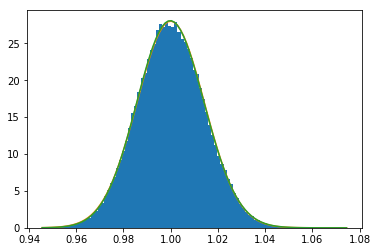

In [37]:
var_tvh = 1
V = 10
H = 10
T = 100
N = 100000

ddof=1

compute_results(var_tvh, V, H, T, N, ddof)

## NETD avec estimateur biaisé, impact du ddof
On fait les mêmes calculs mais avec un estimateur biaisé : ddof=0

### 1 pixel, 10 images, ddof=0

Le ddof introduit un bias dans l'espérance : 
$$E_{ddof=0}(s^2) = \frac{T-1}{T}Var_{tvh}$$
$$Var_{ddof=0}(s^2) = \frac{}{}

Valeur attendue : 1
Moyenne des variances mesurée : 0.8894623389719476
Moyenne attendue : 0.9
Ecart en % : -1.1708512253391534
Variance des variances mesurée : 0.17409751483610916
Variance attendue : 0.18
Ecart en % : -3.279158424383799


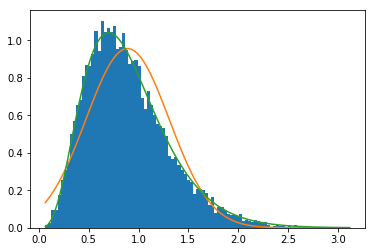

In [32]:
var_tvh = 1
V = 1
H = 1
T = 10
N = 10000
ddof=0

compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 100 images, ddof=0

Valeur attendue : 1
Moyenne des variances mesurée : 0.9912695485223454
Moyenne attendue : 0.99
Ecart en % : 0.12823722447934394
Variance des variances mesurée : 0.019589371260306496
Variance attendue : 0.0198
Ecart en % : -1.0637815136035567


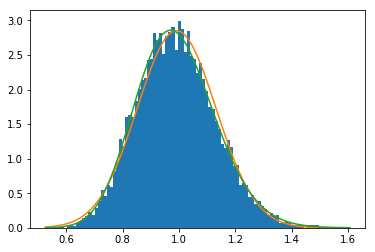

In [34]:
var_tvh = 1
V = 1
H = 1
T = 100
N = 10000
ddof=0
compute_results(var_tvh, V, H, T, N, ddof)

### 1 pixel, 1000 images, ddof=0

Valeur attendue : 1
Moyenne des variances mesurée : 0.9980385910387213
Moyenne attendue : 0.999
Ecart en % : -0.09623713326113448
Variance des variances mesurée : 0.0020095550813818064
Variance attendue : 0.001998
Ecart en % : 0.5783324014917879


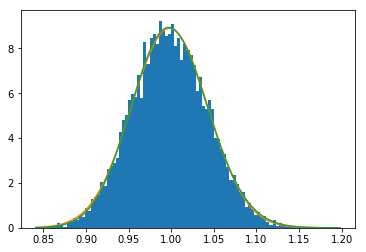

In [36]:
var_tvh = 1
V = 1
H = 1
T = 1000
N = 10000
ddof=0

compute_results(var_tvh, V, H, T, N, ddof)

### 100 pixels, 100 images

Valeur attendue : 1
Moyenne des variances mesurée : 0.9900945172199815
Moyenne attendue : 0.99
Ecart en % : 0.00954719393753134
Variance des variances mesurée : 0.00019408276977866474
Variance attendue : 0.000198
Ecart en % : -1.9783991016844693


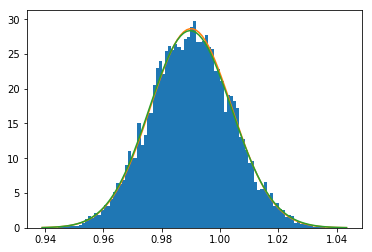

In [35]:
var_tvh = 1
V = 10
H = 10
T = 100
N = 10000
ddof=0

compute_results(var_tvh, V, H, T, N, ddof)